In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import sklearn.metrics as metrics
from keras.optimizers import Adam
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import balanced_accuracy_score
import cv2

# DADOS

In [88]:
xt = np.load("Dados/Xtrain_Classification1.npy") 
yt = np.load("Dados/ytrain_Classification1.npy")
#yt = to_categorical(yt,2)


scalerx = MinMaxScaler().fit(xt)
xScaled = scalerx.transform(xt)
# scalerx = StandardScaler().fit(xt)
# xScaled = scalerx.transform(xt)
# oi = (xt).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()
# oi = (xScaled).reshape(-1,28,28,3)
# for i in oi[0:1]:
#     plt.imshow(i)
#     plt.show()

In [89]:
X_train, X_test, y_train, y_test = train_test_split(xScaled, yt, test_size=0.1, shuffle=True, random_state=10)
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.3, shuffle=True, random_state=10)

from imblearn.over_sampling import SMOTE 

print(y_train)

# sm = SMOTE(random_state = 2) 
# X_train, y_train = sm.fit_resample(X_train, y_train) 


# print(y_train)
  
# print("After OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
# print("After OverSampling, counts of label '0': {}".format(sum(y_train == 0))) 
# y_train = to_categorical(y_train,2)

X_testrs = X_test.reshape(-1, 28,28,3)
X_trainrs = X_train.reshape(-1, 28,28,3)
X_validationrs = X_validation.reshape(-1, 28,28,3)
counter1 = 0
counter0 = 0
for i in y_train:
    if i == 1: 
        counter1 += 1
    if i == 0:
        counter0 +=1

print(counter1)
print(counter0)
addx = np.array([])
addy = np.array([]) 
counterx = 0
print(y_train.shape)
print(X_trainrs.shape)
for idx, i in enumerate(y_train):
    if i == 1:
        for l in range(4):
            if l == 0:
                if not np.any(addx):
                    addx = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addy = np.append(addy,i)
                    

                else:
                    aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_COUNTERCLOCKWISE), axis=0)
                    addx = np.append(addx,aux,axis=0)
                    addy = np.append(addy,i)
                   
            elif l == 1:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx], cv2.ROTATE_90_CLOCKWISE), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)
            
            elif l == 2:
                aux = np.expand_dims(cv2.rotate(X_trainrs[idx],  cv2.ROTATE_180), axis=0) 
                addx = np.append(addx,aux,axis=0)
                addy = np.append(addy,i)

X_trainrs = np.append(X_trainrs,addx,axis=0) 
y_train = np.append(y_train,addy)
y_train = to_categorical(y_train,2)
y_validation = to_categorical(y_validation,2)


print(X_trainrs.shape)
counter1 = 0
counter0 = 0
for i in y_train:
    if i[1] == 1: 
        counter1 += 1
    if i[1] == 0:
        counter0 +=1

print(counter1)
print(counter0)

# counterx=0
# countery=0
# increment = 4
# add = []
# for idx, i in enumerate(y_train):
#         if i[1] == 1:
#             counterx += increment
#             for k in range(0, increment-1):
#                 y_train = np.vstack((y_train, i))
#                 add = np.append(add, X_train[idx, :])
#         else: 
#              countery += 1
# X_train = np.append(X_train, add)
# print(counterx/(counterx+countery), countery/(counterx+countery), counterx, countery)

[0. 0. 1. ... 0. 0. 0.]
535
3404
(3939,)
(3939, 28, 28, 3)
(5544, 28, 28, 3)
2140
3404


# Apenas para ver as imagens

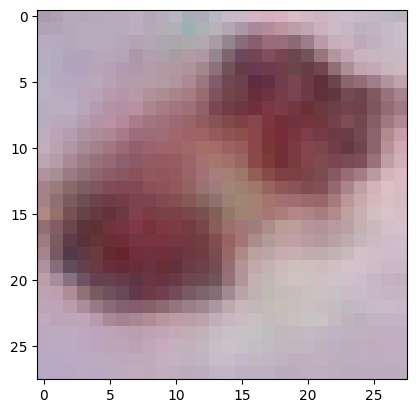

[[0. 1.]]


In [90]:
oi = X_train.reshape(-1,28,28,3)
for i in oi[-1:]:
    plt.imshow(i)
    plt.show()
print(y_train[-1:])

# Código da Neural Network

In [91]:
MLP = Sequential()
MLP.add(Convolution2D(16, (3,3), input_shape=(28,28,3), activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(32, (3,3),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Convolution2D(64, (3,3),activation='relu', padding='same'))
MLP.add(MaxPooling2D(pool_size=(2, 2),strides=2))
MLP.add(Flatten())
MLP.add(Dense(128,activation='relu'))
MLP.add(Dense(64,activation='relu'))
MLP.add(Dense(2, activation='softmax'))

# cnn1 = Sequential([
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same',input_shape=input_shape),
#     Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same'),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.2),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     BatchNormalization(),
#     MaxPooling2D(pool_size=(2, 2),strides=2),
#     Dropout(0.3),
#     Flatten(),
#     Dense(256, activation='relu'),
#     BatchNormalization(),
#     Dropout(0.7),
#     Dense(10, activation='softmax')
# ])

In [92]:
# MLP = Sequential()
# MLP.add(Dense(64,input_dim=28*28*3, activation='relu'))
# MLP.add(Dense(32, activation='relu'))
# MLP.add(Dense(2, activation='softmax'))
#X_trainrs = X_train.reshape(-1, 28*28*3)

In [93]:
MLP.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 3, 3, 64)         

In [94]:
# learning_rate_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate=0.0001,
#     decay_steps=10000,
#     decay_rate=0.96
# )
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.8,
    patience=4,
    min_lr=0.0001
)
MLP.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy', 'mse'])
print(X_trainrs.shape)
print(y_train.shape)
print(X_validationrs.shape)
print(y_validation.shape)


(5544, 28, 28, 3)
(5544, 2)
(1689, 28, 28, 3)
(1689, 2)


In [95]:
Early_callback = EarlyStopping(monitor='val_loss', patience=9, mode='min', verbose=1, restore_best_weights=True, min_delta=0.0001)
hist = MLP.fit(x=X_trainrs, y=y_train, epochs=50, validation_data=(X_validationrs, y_validation), verbose=2, batch_size=32, callbacks=[lr_callback, Early_callback])

Epoch 1/50
174/174 - 3s - loss: 0.5388 - accuracy: 0.6825 - mse: 0.1868 - val_loss: 0.8472 - val_accuracy: 0.4221 - val_mse: 0.3188 - lr: 0.0010 - 3s/epoch - 19ms/step
Epoch 2/50
174/174 - 2s - loss: 0.4218 - accuracy: 0.7854 - mse: 0.1409 - val_loss: 0.4394 - val_accuracy: 0.7845 - val_mse: 0.1444 - lr: 0.0010 - 2s/epoch - 13ms/step
Epoch 3/50
174/174 - 2s - loss: 0.3182 - accuracy: 0.8627 - mse: 0.1001 - val_loss: 0.3619 - val_accuracy: 0.8094 - val_mse: 0.1228 - lr: 0.0010 - 2s/epoch - 13ms/step
Epoch 4/50
174/174 - 2s - loss: 0.2673 - accuracy: 0.8833 - mse: 0.0834 - val_loss: 0.3207 - val_accuracy: 0.8443 - val_mse: 0.1050 - lr: 0.0010 - 2s/epoch - 13ms/step
Epoch 5/50
174/174 - 2s - loss: 0.2454 - accuracy: 0.8954 - mse: 0.0750 - val_loss: 0.3214 - val_accuracy: 0.8609 - val_mse: 0.1023 - lr: 0.0010 - 2s/epoch - 13ms/step
Epoch 6/50
174/174 - 2s - loss: 0.2359 - accuracy: 0.9015 - mse: 0.0718 - val_loss: 0.3329 - val_accuracy: 0.8384 - val_mse: 0.1093 - lr: 0.0010 - 2s/epoch - 13

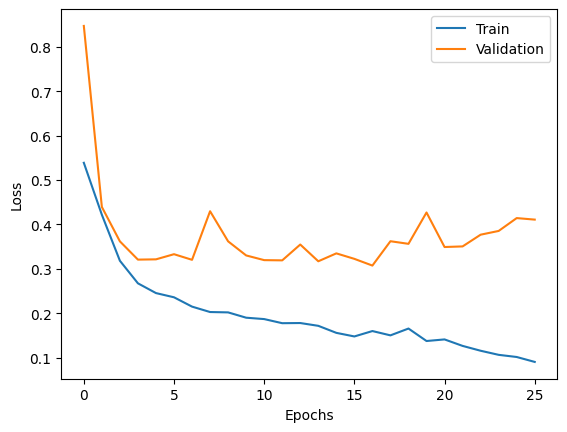

In [96]:
plotx = hist.history['loss']
plotty = hist.history['val_loss']
plt.plot(plotx)
plt.plot(plotty)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'])
plt.show()

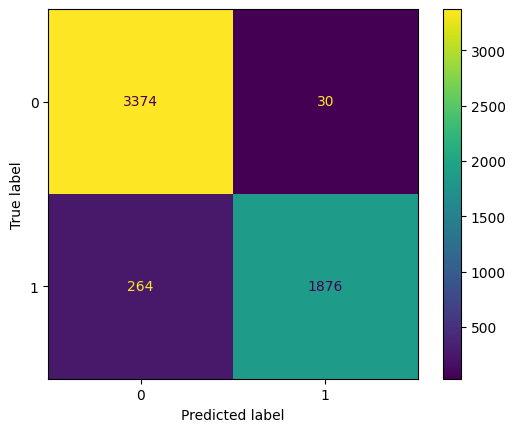

F1 -> 0.9273356401384083


In [103]:
from sklearn.metrics import f1_score
y_predtrain = MLP.predict(X_trainrs, verbose=0)
y_predtrain = np.argmax(y_predtrain, axis=1)
cm2 = confusion_matrix(np.argmax(y_train, axis=1), y_predtrain)
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0,1])
disp2.plot()
plt.show()
print("F1 ->", f1_score(np.argmax(y_train, axis=1), y_predtrain))

In [104]:

y_pred = MLP.predict(X_testrs, verbose=0)
print(y_pred.shape)
y_pred = np.argmax(y_pred, axis=1)
y_test = to_categorical(y_test,2)
print(y_test)
MLP.evaluate(X_testrs, y_test, verbose=1)
y_comp = np.argmax(y_test, axis=1)
print("F1 ->", f1_score(y_comp, y_pred))
print("Balanced ACC ->", balanced_accuracy_score(y_comp, y_pred))
cm = confusion_matrix(y_comp, y_pred)
print(cm)

(626, 2)


InvalidArgumentError: Graph execution error:

Detected at node categorical_crossentropy/mul defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1053, in launch_instance

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\rodri\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\rodri\AppData\Local\Temp\ipykernel_15040\2294716021.py", line 5, in <module>

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2272, in evaluate

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 4079, in run_step

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2042, in test_function

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2025, in step_function

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 2013, in run_step

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1895, in test_step

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2221, in categorical_crossentropy

  File "c:\Users\rodri\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\backend.py", line 5594, in categorical_crossentropy

Incompatible shapes: [32,2] vs. [32,2,2,2,2]
	 [[{{node categorical_crossentropy/mul}}]] [Op:__inference_test_function_68879]

In [99]:
counter = 0
for i in range(len(y_comp)):
    if(y_pred[i] != y_comp[i]):
        #print(i, "\t", y_pred[i], "\t", y_test[i])
        counter+=1
counter

94

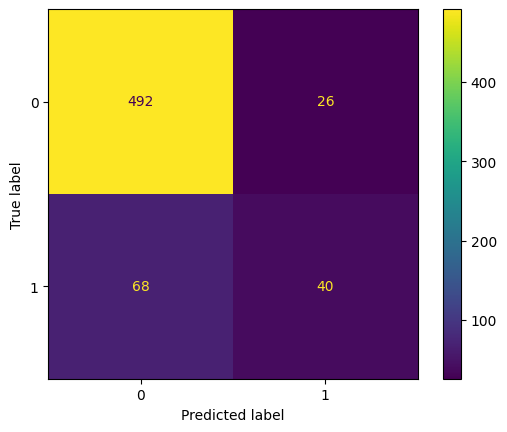

In [100]:
cm = confusion_matrix(y_comp, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
disp.plot()
plt.show()
